# Z-оценка

In [1]:
import pandas as pd
import scipy.stats
import numpy as np

In [2]:
eng = pd.read_csv('Data/eng_test.csv', sep=';')
eng.head()

,Id,Exam,Score,Advanced
0,ID1,TOEFL,77.0,NO
1,ID10,TOEFL,105.0,NO
2,ID100,TOEFL,107.0,YES
3,ID101,TOEFL,72.0,NO
4,ID102,TOEFL,120.0,YES


<AxesSubplot: >

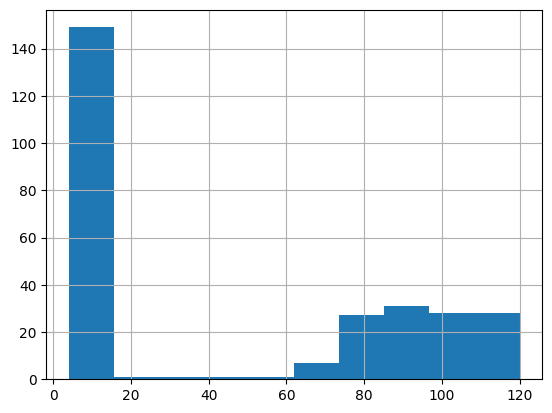

In [3]:
eng['Score'].hist()

Получился странный график, потому что у двух экзаменов разные шкалы оценивания.

In [5]:
# какие значения в Exam?
eng['Exam'].unique()

array(['TOEFL', 'IELTS'], dtype=object)

In [6]:
# выведем статистику только про 'TOEFL'
toefl = eng[eng['Exam'] == 'TOEFL']
toefl.describe()

,Score
count,125.000000
mean,93.776000
std,17.903804
min,25.000000
25%,81.000000
50%,94.000000
75%,107.000000
max,120.000000


<AxesSubplot: >

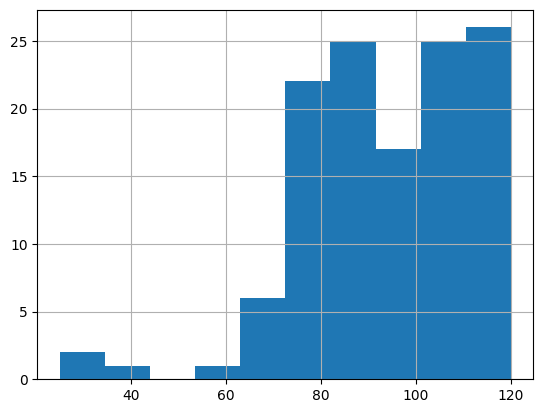

In [7]:
toefl['Score'].hist()

In [8]:
# а теперь про ielts
ielts = eng[eng['Exam'] == 'IELTS']
ielts.describe()

,Score
count,149.000000
mean,6.432886
std,1.571126
min,4.000000
25%,5.000000
50%,6.500000
75%,8.000000
max,9.000000


<AxesSubplot: >

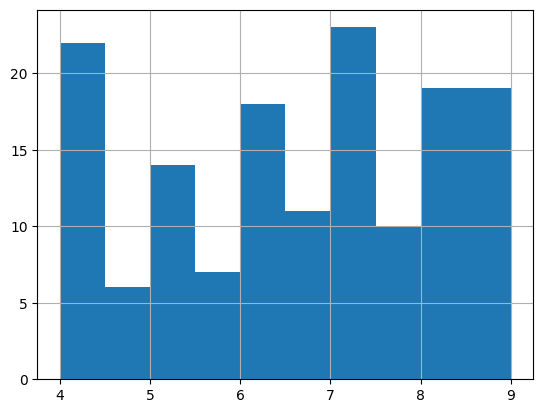

In [9]:
ielts['Score'].hist()

Получается, что у нас два распределения. От 0 до 10 и от 0 до 120. С разным средним и разным стандартным отклонением. Как делать выводы, кто молодец?

Что лучше: 7 из 10 или 84 из 120?

(и то, и другое решение 70% экзамена, но получается, что первый решил лучше среднего и медианы, а второй хуже)

Как привести к единой шкале?

Идея: перевести наши значения в расстояние до среднего в сигмах (в стандартных отклонениях)

Формула z оценки: `𝑧 = (𝑋 – μ)/σ`

In [10]:
# вот студент с оценкой за экзамен
X = toefl['Score'][0]
X
# посчитаем z-оценку для него

77.0

In [11]:
# вот среднее за экзамен
M = toefl['Score'].mean()
M

93.776

In [12]:
# вот стандартное отклонение
sigma = toefl['Score'].std(ddof=0)
sigma

17.832044863110905

In [13]:
# вот z-оценка
z_score = (X - M) / sigma
z_score

-0.9407782522297515

В обратную сторону тоже легко: `𝑋 = μ + 𝑧*σ`

In [14]:
z_new = 1.4706109
X_new = M + z_new * sigma
print(X_new)

119.9999995449799


Если перевести все значения в z-оценки, получится `z-распределение` (или стандартизированное).

Среднее в нем будет равно нулю, а среднеквадратичное отклонение — единице.

`scipy.stats.zscore()` - для z-оценки 

In [15]:
scipy.stats.zscore(toefl['Score'])

0     -0.940778
1      0.629429
2      0.741586
3     -1.221172
4      1.470611
         ...   
269   -0.323911
270   -0.211754
271   -0.211754
272   -2.230591
273    0.685507
Name: Score, Length: 125, dtype: float64

Посмотрим на toefl и ielts

In [16]:
toefl['z-score'] = scipy.stats.zscore(toefl['Score'])

/var/folders/91/b5c9lg_s0c9bslz7x5586n040000gp/T/ipykernel_16508/3100172893.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toefl['z-score'] = scipy.stats.zscore(toefl['Score'])


In [17]:
ielts['z-score'] = scipy.stats.zscore(ielts['Score'])

/var/folders/91/b5c9lg_s0c9bslz7x5586n040000gp/T/ipykernel_16508/1836317712.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ielts['z-score'] = scipy.stats.zscore(ielts['Score'])


In [18]:
ielts

,Id,Exam,Score,Advanced,z-score
30,ID126,IELTS,9.0,YES,1.639443
31,ID127,IELTS,5.0,NO,-0.915088
32,ID128,IELTS,7.5,YES,0.681494
33,ID129,IELTS,5.0,NO,-0.915088
35,ID130,IELTS,4.0,NO,-1.553720
...,...,...,...,...,...
190,ID270,IELTS,8.0,YES,1.000810
191,ID271,IELTS,6.5,NO,0.042861
192,ID272,IELTS,4.0,NO,-1.553720
193,ID273,IELTS,7.0,YES,0.362178


In [19]:
eng = pd.concat([toefl, ielts])

In [20]:
eng

,Id,Exam,Score,Advanced,z-score
0,ID1,TOEFL,77.0,NO,-0.940778
1,ID10,TOEFL,105.0,NO,0.629429
2,ID100,TOEFL,107.0,YES,0.741586
3,ID101,TOEFL,72.0,NO,-1.221172
4,ID102,TOEFL,120.0,YES,1.470611
...,...,...,...,...,...
190,ID270,IELTS,8.0,YES,1.000810
191,ID271,IELTS,6.5,NO,0.042861
192,ID272,IELTS,4.0,NO,-1.553720
193,ID273,IELTS,7.0,YES,0.362178


Теперь все результаты можно изобразить на одном графике

<AxesSubplot: >

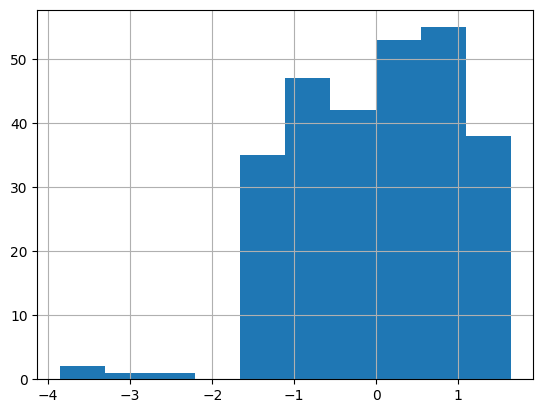

In [21]:
eng['z-score'].hist()

In [22]:
# Кто в 0.1 сдавших хуже всего? 
eng[eng['z-score'] < -3]

,Id,Exam,Score,Advanced,z-score
25,ID121,TOEFL,32.0,NO,-3.464325
27,ID123,TOEFL,25.0,YES,-3.856877


In [23]:
# Лучше сдала Advanced группа? (посмотреть среднее по группам)
eng.groupby('Advanced')['z-score'].mean()

Advanced
NO    -0.397672
YES    0.440499
Name: z-score, dtype: float64

# Корреляция

Идея: распределение похоже на облако - корреляции нет, коэффициент корреляции равен 0, а если распределение похоже на линию, то коэффициент стремится к 1 (при "возрастании") и к -1 (при "убывании")

Коэффициент Пирсона:  `𝑟 = (∑(𝑥−𝑀𝑥)⋅(𝑦−𝑀𝑦)) / √(∑(𝑥−𝑀𝑥)^2⋅∑(𝑦−𝑀𝑦)^2)`

In [27]:
# Пример на доске
x = np.array([3, 6, 10])  # кол-во часов подготовки
y = np.array([4, 8, 10])  # оценка за работу
Mx = x.mean()
My = y.mean()
numerator = ((x - Mx)*(y-My)).sum()
div = np.sqrt(((x - Mx)**2).sum()*((y - My)**2).sum())
numerator/div

0.9631231373018602

**А теперь велосипеды**

In [28]:
import warnings
warnings.filterwarnings('ignore')

bikes = pd.read_pickle('data/BikesDataImputed.pkl')
bikes.head()

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Good Weather
0,2017-12-01,0,-5.2,37,2.2,0.0,0.0,Winter,0,True,257,0,Freezing,0
1,2017-12-01,1,-5.5,38,0.8,0.0,0.0,Winter,0,True,219,0,Freezing,0
2,2017-12-01,2,-6.0,39,1.0,0.0,0.0,Winter,0,True,162,0,Freezing,0
3,2017-12-01,3,-6.2,40,0.9,0.0,0.0,Winter,0,True,148,1,Freezing,0
4,2017-12-01,4,-6.0,36,2.3,0.0,0.0,Winter,0,True,97,0,Freezing,0


In [29]:
# тут NaN значения заполнили, мы это потом потренируем

### Коррелирует ли средняя температура на неделе с количеством взятых велосипедов?

In [30]:
# группируем по неделям
temp_mean = bikes.groupby(bikes['Date'].dt.isocalendar().week)['Temperature'].mean()
bikes_sum = bikes.groupby(bikes['Date'].dt.isocalendar().week)['Rental Count'].sum()

In [31]:
temp_mean

week
1     -2.694940
2     -5.079762
3      2.662500
4    -10.038690
5     -5.650595
6     -5.486310
7     -1.225298
8      1.631548
9      4.004167
10     5.269940
11    10.133036
12     6.162202
13    13.890774
14    10.283631
15    11.713988
16    14.669940
17    14.061310
18    16.365476
19    16.220238
20    19.307738
21    18.988988
22    22.223214
23    22.628869
24    21.751190
25    24.036012
26    23.757143
27    24.758333
28    25.858333
29    29.297619
30    30.740774
31    32.193750
32    30.518452
33    29.238690
34    26.901488
35    24.691071
36    22.962798
37    22.782143
38    20.743750
39    18.413690
40    17.019643
41    12.672024
42    13.542857
43    11.788393
44     8.882440
45    11.590774
46     7.953571
47     4.422321
48     3.505208
49    -0.992560
50    -6.645536
51     0.210714
52    -1.651786
Name: Temperature, dtype: float64

In [32]:
bikes_week = pd.concat([temp_mean, bikes_sum], axis=1)

In [33]:
first_five = bikes_week.iloc[:5]

In [34]:
first_five

,Temperature,Rental Count
week,,
1,-2.694940,39441
2,-5.079762,30871
3,2.662500,42193
4,-10.038690,23079
5,-5.650595,28415


<AxesSubplot: xlabel='Temperature', ylabel='Rental Count'>

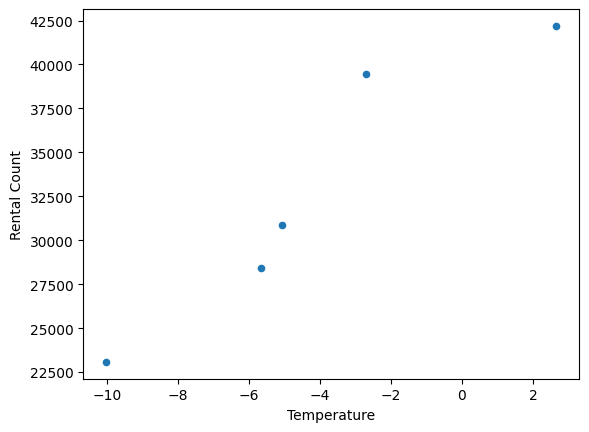

In [35]:
first_five.plot('Temperature','Rental Count', kind='scatter')

In [36]:
first_five['X - Mx'] = first_five['Temperature'] - first_five['Temperature'].mean()
first_five['Y - My'] = first_five['Rental Count'] - first_five['Rental Count'].mean()

In [39]:
SSx = (first_five['X - Mx']**2).sum()
SSy = (first_five['Y - My']**2).sum()
SP = (first_five['X - Mx'] * first_five['Y - My']).sum()
print('SSx:', SSx)
print('SSy:', SSy)
print('SP:', SP)

SSx: 86.31974305555556
SSy: 249778436.8
SP: 139270.43345238097


In [40]:
r = SP / np.sqrt(SSx * SSy)
print(r)

0.9484760874616524


А теперь питоном

In [41]:
first_five['Temperature'].corr(first_five['Rental Count'])

0.9484760874616526

А теперь для всех недель

In [42]:
bikes_week['Temperature'].corr(bikes_week['Rental Count'])

0.8458075200534891

<AxesSubplot: xlabel='Temperature', ylabel='Rental Count'>

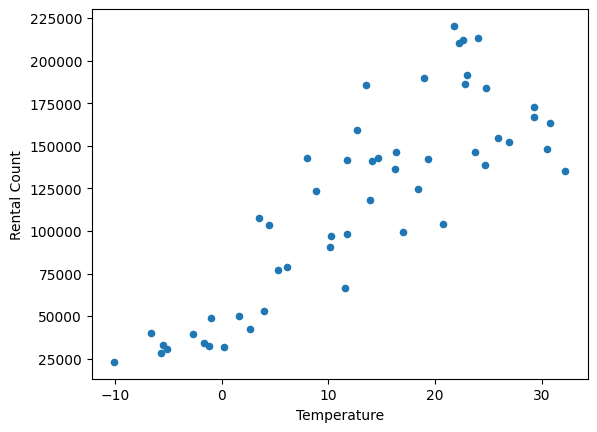

In [43]:
bikes_week.plot('Temperature','Rental Count', kind='scatter')

Все столбцы сразу

In [44]:
bikes.corr()

,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Holiday,Functioning Day,Rental Count,Normal Humidity,Good Weather
Hour,1.000000e+00,0.123610,-0.241644,0.285197,0.008715,-0.021516,-1.391486e-16,0.005439,0.345622,0.107503,0.073698
Temperature,1.236105e-01,1.000000,0.159793,-0.036418,0.050758,-0.217846,-5.570102e-02,-0.049849,0.454749,0.025467,0.206979
Humidity,-2.416438e-01,0.159793,1.000000,-0.336683,0.236397,0.108183,-5.027765e-02,-0.020800,-0.169085,-0.285947,-0.115874
Wind speed,2.851967e-01,-0.036418,-0.336683,1.000000,-0.019674,-0.003554,2.301677e-02,0.005037,0.097583,0.074964,0.032127
Rainfall,8.714642e-03,0.050758,0.236397,-0.019674,1.000000,0.008500,-1.426911e-02,0.002055,-0.103519,-0.095339,-0.042127
Snowfall,-2.151645e-02,-0.217846,0.108183,-0.003554,0.008500,1.000000,-1.259072e-02,0.032089,-0.120869,-0.067939,-0.054942
Holiday,-1.391486e-16,-0.055701,-0.050278,0.023017,-0.014269,-0.012591,1.000000e+00,-0.027624,-0.068822,-0.020156,0.029008
Functioning Day,5.439377e-03,-0.049849,-0.020800,0.005037,0.002055,0.032089,-2.762445e-02,1.000000,0.173437,0.002488,-0.101806
Rental Count,3.456218e-01,0.454749,-0.169085,0.097583,-0.103519,-0.120869,-6.882160e-02,0.173437,1.000000,0.128521,0.194224
Normal Humidity,1.075026e-01,0.025467,-0.285947,0.074964,-0.095339,-0.067939,-2.015629e-02,0.002488,0.128521,1.000000,0.440102


Но на `bikes` неудобно смотреть, потому что там про часы. Дополним датафрейм `bikes_week` про недели

In [45]:
humidity_mean = bikes.groupby(bikes['Date'].dt.isocalendar().week)['Humidity'].mean()
wind_mean = bikes.groupby(bikes['Date'].dt.isocalendar().week)['Wind speed'].mean()

In [46]:
bikes_week = pd.concat([bikes_week, humidity_mean, wind_mean], axis=1)

In [47]:
bikes_week.corr()

,Temperature,Rental Count,Humidity,Wind speed
Temperature,1.000000,0.845808,0.584642,-0.420474
Rental Count,0.845808,1.000000,0.389963,-0.434142
Humidity,0.584642,0.389963,1.000000,-0.456225
Wind speed,-0.420474,-0.434142,-0.456225,1.000000


In [48]:
bikes_week.corr()['Rental Count']

Temperature     0.845808
Rental Count    1.000000
Humidity        0.389963
Wind speed     -0.434142
Name: Rental Count, dtype: float64

In [49]:
bikes_week.corr()['Rental Count'].sort_values()

Wind speed     -0.434142
Humidity        0.389963
Temperature     0.845808
Rental Count    1.000000
Name: Rental Count, dtype: float64

In [50]:
# вот по модулю
bikes_week.corr()['Rental Count'].apply(np.abs).sort_values()

Humidity        0.389963
Wind speed      0.434142
Temperature     0.845808
Rental Count    1.000000
Name: Rental Count, dtype: float64

In [51]:
corr = bikes_week.corr()
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)

Temperature   Temperature     1.000000
Rental Count  Rental Count    1.000000
Humidity      Humidity        1.000000
Wind speed    Wind speed      1.000000
Temperature   Rental Count    0.845808
Rental Count  Temperature     0.845808
Temperature   Humidity        0.584642
Humidity      Temperature     0.584642
              Wind speed      0.456225
Wind speed    Humidity        0.456225
Rental Count  Wind speed      0.434142
Wind speed    Rental Count    0.434142
Temperature   Wind speed      0.420474
Wind speed    Temperature     0.420474
Rental Count  Humidity        0.389963
Humidity      Rental Count    0.389963
dtype: float64